# Optimization for Logistic Regression

**Source code:** [logisticRegression.py](https://github.com/vydiep/vydiep.github.io/blob/main/posts/logisticRegression/logisticRegression.py)

---

### What is the purpose of this blog post?

This blog post will cover gradient descent and a key variant of the gradient descent called stochastic gradient descent for the logistic regression algorithm. This is an algorithm that uses a logistic function to model the relationship between the input features and the probability of a binary outcome (i.e., "yes" or "no" prediction). 

---

### Brief Walk-Through of Our Logistic Regression Implementation

In our LogisticRegression class, we implemented a `fit` method and a `fit_stochastic` method. Both methods take in some input data, `X`, the target labels, `y`, as well as hyperparameters `alpha` and `max_epochs`. The hyperparameter `alpha` is the learning rate for the gradient descent algorithm, and `max_epochs` is the maximum number of iterations the algorithm should run for. The `fit_stochastic` method also has two additional hyperparameters: `batch_size` and `momentum`. The hyperparameters `batch_size`, is the number of samples to use for each mini-batch during stochastic gradient descent, and `momentum` is a boolean for whether or not to use momentum in the optimization process.

In the `fit` method, a random weight vector `self.w` is initialized with shape `(p,)`, where `p` is the number of features in the modified input data. The method enters a loop that iterates over `max_epochs`, and with each iteration, it computes the gradient of the loss function with respects to the weight vector by using the `gradient` method. This method implements the gradient of the empirical risk for logistic regression:

<h4 align="center">$\nabla{L(w) = \frac1n\sum_{i=1}^n (\sigma(\hat{y_i}) - {y_i}){x_i}}$</h4>

With each iteration, the method also performs a gradient step to update the weight vector, computes the loss and score on the training data using the updated weight vector, and stores the loss and score histories in `self.loss_history` and `self.score_history`. If the difference in loss between consecutive iterations is small, the loop will terminate early. 

The `fit_stochastic` method is similar to the `fit` method, except it computes the gradient descent on batches of the data instead of the whole data. It updates the weight vector with the gradient and momentum, if enabled, accordingly. It then computes the loss and adds it to a list, and checks if the new loss is close enough to the previous loss to terminate early.

---

## Preparing for Experiments

Before starting, you need to load all of these lilbraries and modules:

In [88]:
from logisticRegression import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

def graph_lossNline(X, y, LR):
    '''
    Visualizes the performance of the classifier and check the value of the loss it achieves
    
    Parameters:
        X: Input features of the dataset
        y: Labels of the dataset
        LR: Instance of a class with the follow attributes:
            - w: model parameters
            - loss_history: empirical risk of the model after each iteration of gradient descent
            
    Returns:
        None
        
    Plots:
        Subplot 1: Scatter plot of the input features, colored according to their labels. The decision boundary of the model is plotted in black
        Subplot 2: Line plot of the empirical risk of the model as a function of the iteration number
        
    Referenced: https://middlebury-csci-0451.github.io/CSCI-0451/lecture-notes/gradient-descent.html
    '''
    fig, axarr = plt.subplots(1, 2)

    axarr[0].scatter(X[:,0], X[:,1], c = y)
    axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

    f1 = np.linspace(-3, 3, 101)

    p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

    axarr[1].plot(LR.loss_history)
    axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
    plt.tight_layout()

You also want to understand how `fit`(gradient descent) and `fit_stochastic` (stochastic gradient descent) work. Here is an example for each method:

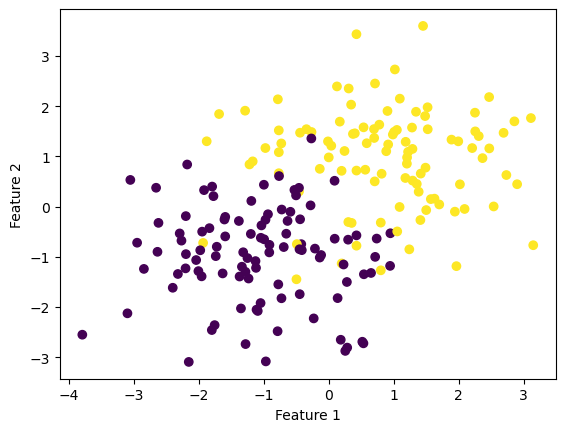

In [130]:
# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Here we generated a data set with two features. Notice how their labels are overlapping each other. We can then fit this data using `fit` and `fit_stochastic` with a reasonable learning rate so that they would converge.

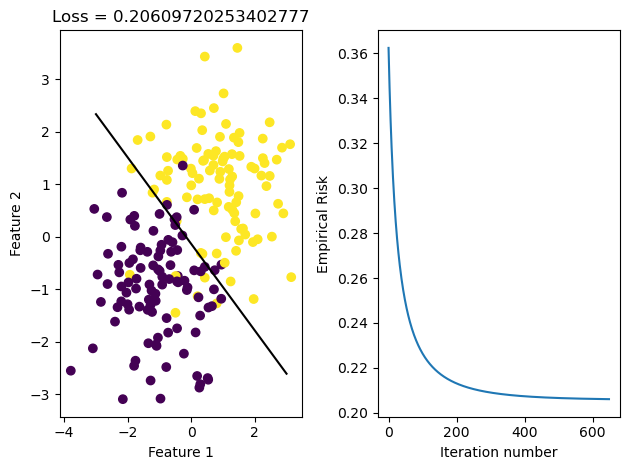

In [131]:
# fit the model

LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 1000)

graph_lossNline(X, y, LR)

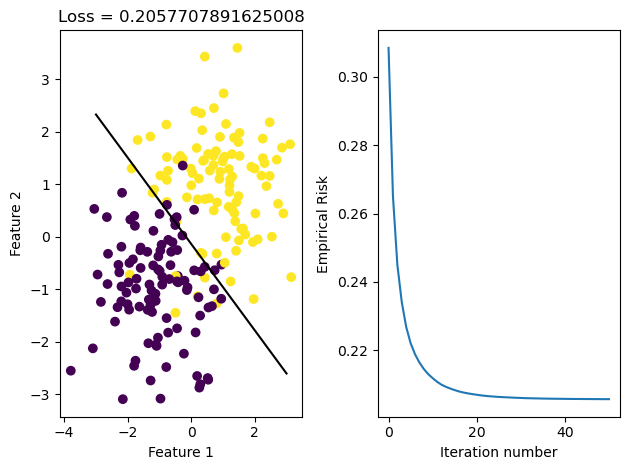

In [132]:
# fit the model

LR_stochastic = LogisticRegression()
LR_stochastic.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, batch_size = 10)

graph_lossNline(X, y, LR_stochastic)

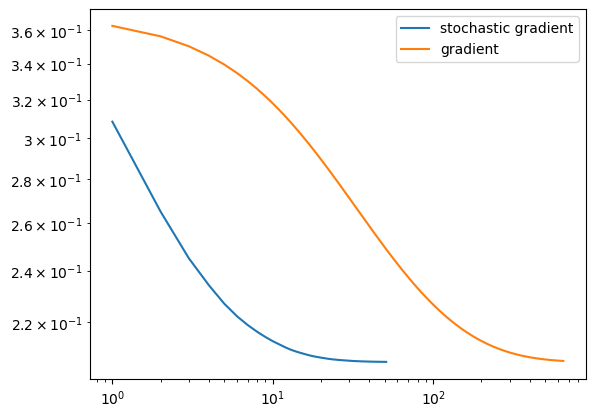

In [133]:
num_steps = len(LR_stochastic.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_stochastic.loss_history, label = "stochastic gradient")

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 

In the visualization above, you can see that the data was able to converge for both methods. The logistic regression with stochastic gradient descent seems to converge faster than logistic regression with regular gradient descent. This may be because stochastic gradient descent updates the weight based on the gradient of the loss function with respect to a small batch of data at a time, while the regular gradient descent is based on the entire training set. 

---

### Experiment 1: Learning Rate

This experiment tests the influence of a high learning rate on the convergence of gradient descent and stochastic descent to a minimizer.

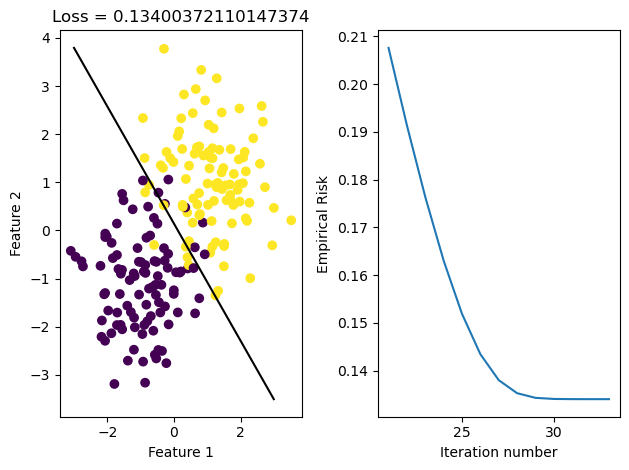

In [126]:
LR = LogisticRegression()
LR.fit(X, y, alpha = 66, max_epochs = 1000)

graph_lossNline(X, y, LR)

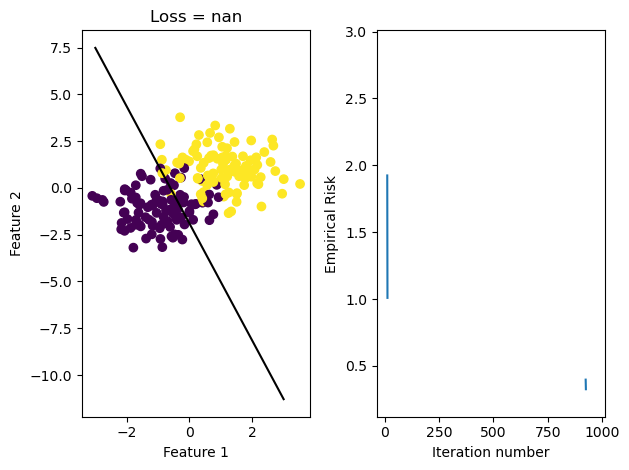

In [127]:
# fit the model

LR_stochastic = LogisticRegression()
LR_stochastic.fit_stochastic(X, y, alpha = 66, max_epochs = 1000, batch_size = 10)

graph_lossNline(X, y, LR_stochastic)

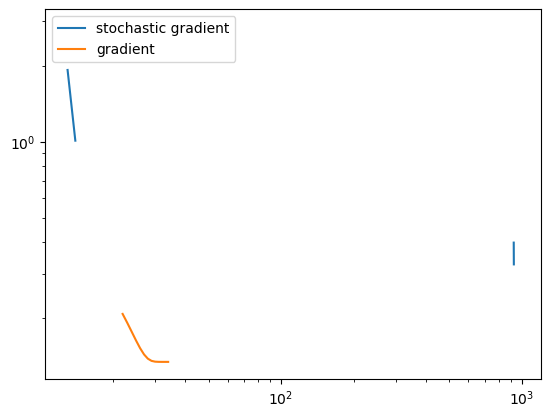

In [128]:
num_steps = len(LR_stochastic.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_stochastic.loss_history, label = "stochastic gradient")

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 

It is important to keep the learning rate small to ensure that the algorithm converges stably and the optimization process is under control. If the learning rate is too large, the optimization algorithm can overshoot the minimum of the loss function and fail to converge to an optimal solution.

You can see that with increasing the learning rate to 66 from the 0.1 that it was previously set to, the loss function's values (normal gradient descent) vary significantly instead of decreasing steadily and never converged. The one with stochastic gradient descent failed to converge so badly that it's loss is not even a number. 

---

### Experiment 2: Batch Size

This experiment tests the influence of batch size on how quickly the algorithm converges.

In [182]:
# Make the data
p_features = 19
X, y = make_blobs(n_samples = 888, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

def graph_loss(LR):
    ''' 
    Plots the loss history of a logistic regression model
    '''
    fig, axarr = plt.subplots(1, 1)

    axarr.plot(LR.loss_history)
    axarr.set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = f"Loss = {LR.loss_history[-1]}")
    plt.tight_layout()

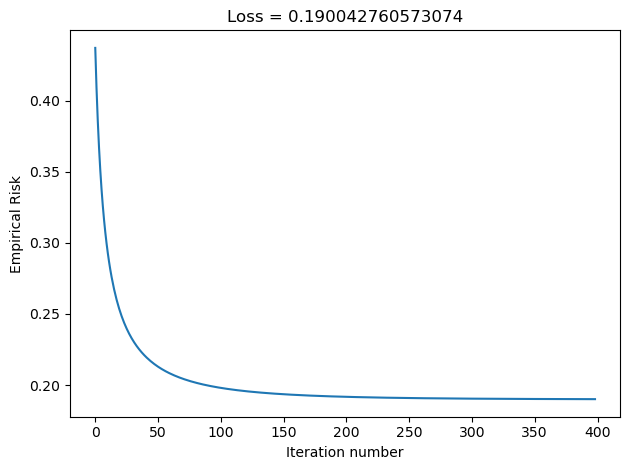

In [183]:
LR_8000 = LogisticRegression()
LR_8000.fit_stochastic(X, y, alpha = 0.1, max_epochs = 8888, batch_size = 800)

graph_loss(LR_8000)

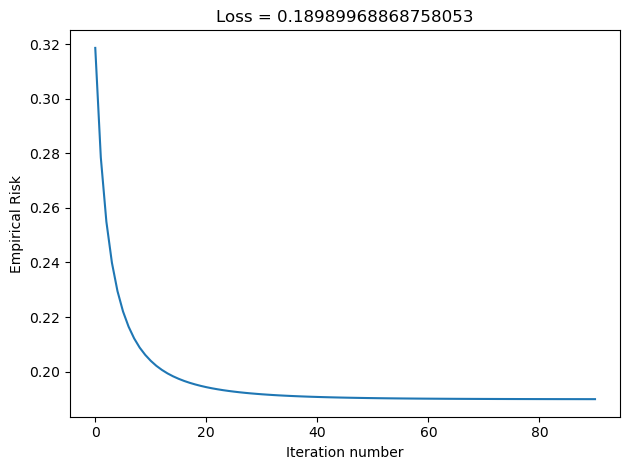

In [184]:
LR_800 = LogisticRegression()
LR_800.fit_stochastic(X, y, alpha = 0.1, max_epochs = 8888, batch_size = 80)

graph_loss(LR_800)

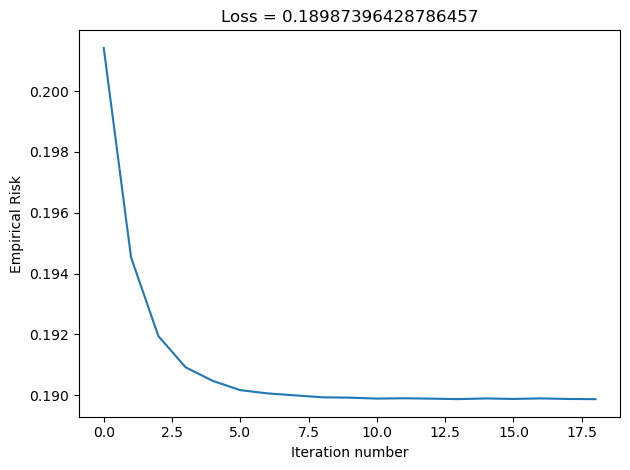

In [187]:
LR_80 = LogisticRegression()
LR_80.fit_stochastic(X, y, alpha = 0.1, max_epochs = 8888, batch_size = 8)

graph_loss(LR_80)

For this experiment, we generated a data set that has 888 data points and 18 features. From there, we visualized the loss history of the algorithm if the batch size was 800, 80, and 8. With every decrease in batch size, there was a decrease in the number of iterations done. It is also important to note that when the batch size was 8, there was a bit more fluctuation in the loss than when the batch size was larger. Overall, we can see that a smaller batch size will result in faster convergence, although there will be a bit more variations in loss, and a larger batch size will result in a smoother convergence.

---

### Experiment 3: Momentum

Momentum is a technique used to accerlate the convergence of the optimization algorithm. It adds a fraction of the previous gradient to the current gradient during each iteration. The overall idea is that if the previous weight update was good, keep heading in that direction. The experiment below shows that momentum reduces the number of iterations done.

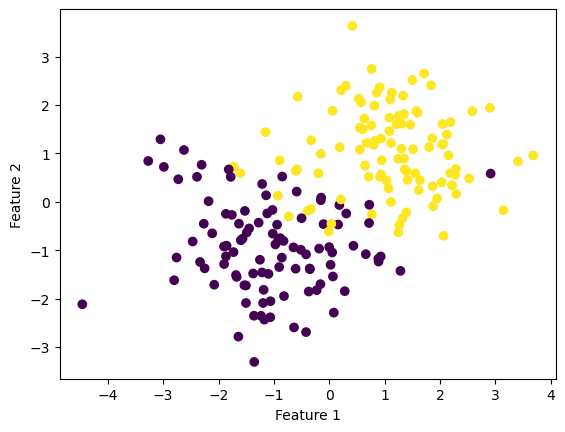

In [188]:
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

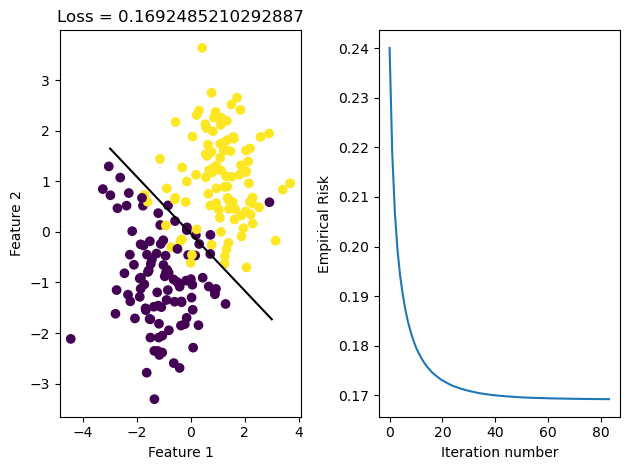

In [191]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10, momentum = False)

graph_lossNline(X, y, LR)

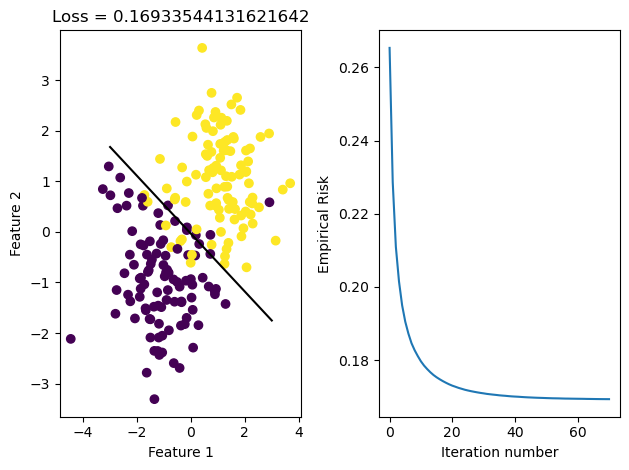

In [192]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10, momentum = True)

graph_lossNline(X, y, LR)